# 0. Code Library and Links

https://rstudio.github.io/keras/

https://cran.r-project.org/web/packages/kerasR/vignettes/introduction.html

## Installation
***rstudio/keras***

In [10]:
# install.packages("Rcpp")

In [11]:
# install.packages("devtools")

In [12]:
# devtools::install_github("rstudio/reticulate", force=TRUE)

In [13]:
# devtools::install_github("r-lib/processx")

In [1]:
library(processx)

In [2]:
# devtools::install_github("rstudio/tensorflow", force=TRUE)

In [3]:
# devtools::install_github("rstudio/keras")

In [4]:
library(keras)

In [5]:
# install_tensorflow()

## Additional Resources

In [5]:
library(repr)
library(readr)

In [7]:
library(caret)

In [70]:
# r color names 
# colors()

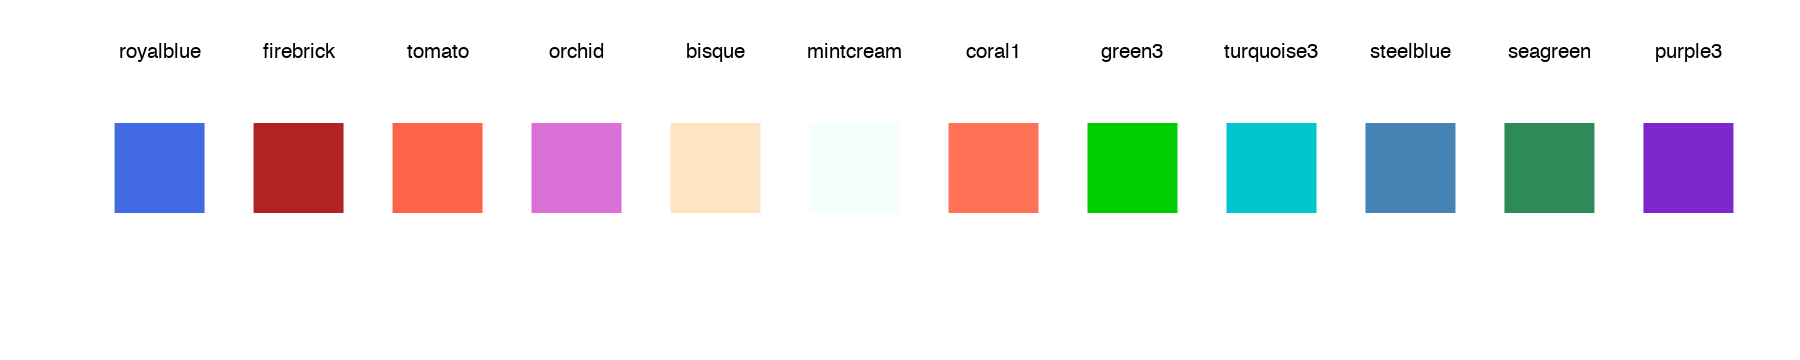

In [97]:
col.lst <- c("royalblue", "firebrick", "tomato", "orchid", "bisque", "mintcream", 
             "coral1", "green3", "turquoise3", "steelblue", "seagreen", "purple3")
             
options(repr.plot.width=15, repr.plot.height=3)            
             
plot(1:12, rep(1,12), axes = FALSE, pch=15, cex=10, col=col.lst, xlab=NA, ylab=NA, xlim = c(1, 12))
axis(1, at=1:12, labels = sprintf("%s", col.lst), col="white", cex=0.5, padj=-15)

# 1. Data Samples

In [8]:
train <- read_csv("digit_train.csv")
test <- read_csv("digit_test.csv")

Parsed with column specification:
cols(
  .default = col_integer()
)
See spec(...) for full column specifications.
Parsed with column specification:
cols(
  .default = col_integer()
)
See spec(...) for full column specifications.


In [9]:
head(train[, 1:14], 3)

label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12
1,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
prop.table(table(train$label))*100


        0         1         2         3         4         5         6         7 
 9.838095 11.152381  9.945238 10.359524  9.695238  9.035714  9.850000 10.478571 
        8         9 
 9.673810  9.971429 

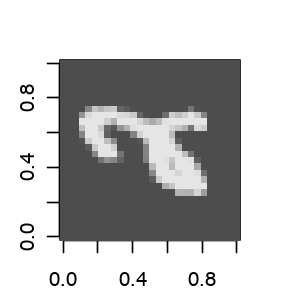

In [11]:
img = matrix(unlist(train[200,-1]), nrow = 28, byrow = T)

options(repr.plot.width=2.5, repr.plot.height=2.5)
par(pin=c(1.5, 1.5))

image(img, col=gray.colors(255))

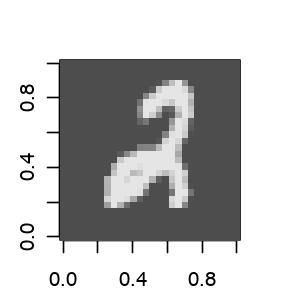

In [12]:
rotate <- function(x) t(apply(x, 2, rev)) 

options(repr.plot.width=2.5, repr.plot.height=2.5)
par(pin=c(1.5,1.5))
    
image(rotate(img), col=gray.colors(255))

In [13]:
train$label <- factor(train$label)

intrain <- createDataPartition(y=train$label, p=0.8, list=FALSE)

x_train <- train[intrain, -1]
x_test <- train[-intrain, -1]

y_train_labels <- train$label[intrain]
y_test_labels  <- train$label[-intrain]

x_train <- as.matrix(x_train)
x_test <- as.matrix(x_test)

y_train_labels  <- as.integer(as.character(y_train_labels))
y_test_labels  <- as.integer(as.character(y_test_labels))

In [14]:
dim(x_train)

[1] 33604   784

In [15]:
dim(x_test)

[1] 8396  784

In [16]:
class(x_train)

[1] "matrix"

In [17]:
class(y_train_labels)

[1] "integer"

In [18]:
# rescale
x_train <- x_train / 255
x_test <- x_test / 255

In [19]:
# one-hot encode
y_train <- to_categorical(y_train_labels, 10)
y_test <- to_categorical(y_test_labels, 10)

In [20]:
dim(y_train)

[1] 33604    10

In [21]:
dim(y_test)

[1] 8396   10

In [22]:
# ?dataset_cifar10

In [23]:
cifar10 <- dataset_cifar10()

x_train2 <- cifar10$train$x/255
x_test2 <- cifar10$test$x/255
y_train2 <- to_categorical(cifar10$train$y, num_classes = 10)
y_test2 <- to_categorical(cifar10$test$y, num_classes = 10)

In [24]:
dim(x_train2[200,,,])

[1] 32 32  3

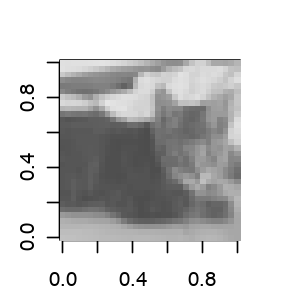

In [25]:
img2 = matrix(unlist(x_train2[10,,,]), 32, 32, 3)

options(repr.plot.width=2.5, repr.plot.height=2.5)
par(pin=c(1.5, 1.5))

image(rotate(rotate(img2)), col=gray.colors(255))

# 2. Models

## Multi-layer Perceptron

In [26]:
mlp_model <- keras_model_sequential() 
mlp_model %>% 
  layer_dense(units = 196, activation = 'relu', input_shape = c(784)) %>% 
  layer_dropout(rate = 0.5) %>% 
  layer_dense(units = 784, activation = 'relu') %>%
  layer_dropout(rate = 0.5) %>%
  layer_dense(units = 10, activation = 'softmax')

In [27]:
mlp_model %>% compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = c('accuracy'))

In [28]:
summary(mlp_model)

Model
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
dense_1 (Dense)                     (None, 196)                     153860      
________________________________________________________________________________
dropout_1 (Dropout)                 (None, 196)                     0           
________________________________________________________________________________
dense_2 (Dense)                     (None, 784)                     154448      
________________________________________________________________________________
dropout_2 (Dropout)                 (None, 784)                     0           
________________________________________________________________________________
dense_3 (Dense)                     (None, 10)                      7850        
Total params: 316,158
Trainable params: 316,158
Non-trainable params: 0
_______________________________

In [29]:
mlp_history <- mlp_model %>% fit(x_train, y_train, epochs = 30, batch_size = 128, validation_split = 0.2)

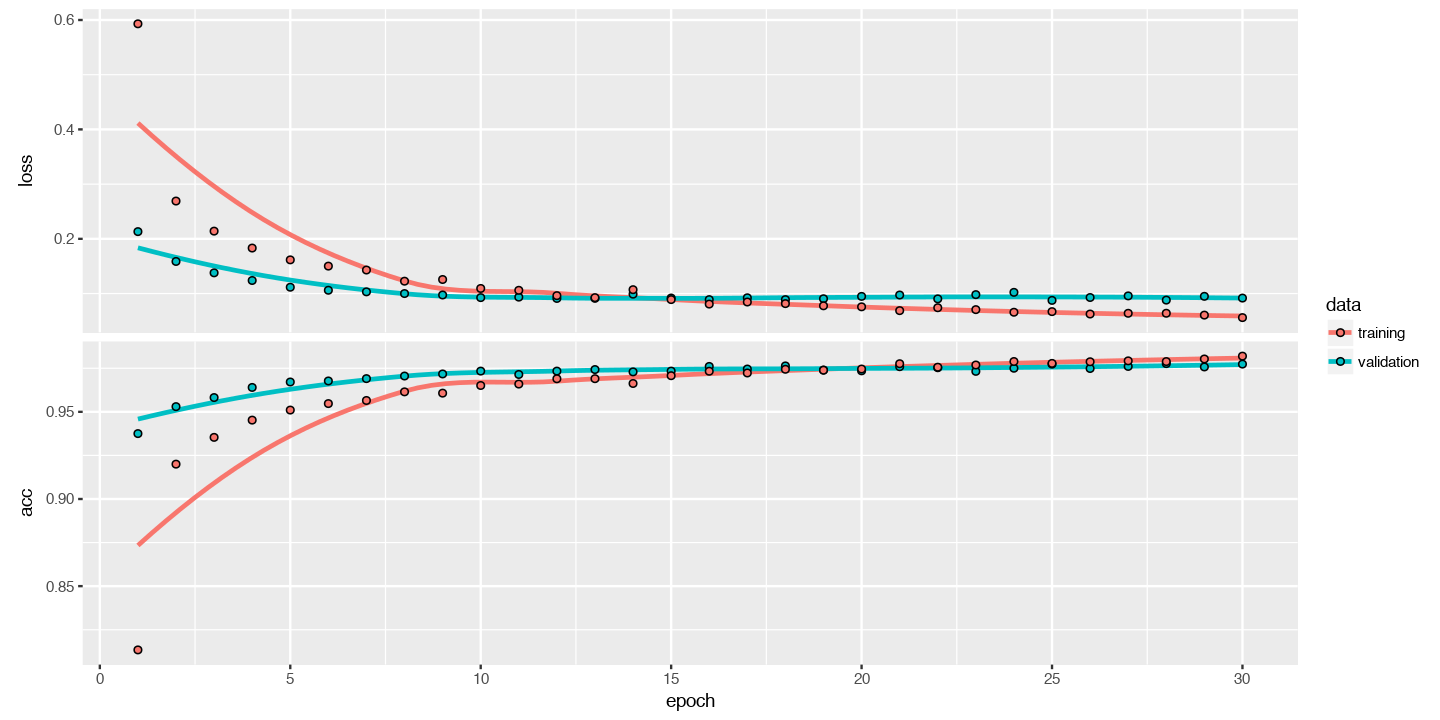

In [30]:
options(repr.plot.width=12, repr.plot.height=6)
par(pin=c(11, 5.5))
    
plot(mlp_history)

In [31]:
mlp_loss_and_metrics <- mlp_model %>% evaluate(x_test, y_test)
mlp_loss_and_metrics

[[1]]
[1] 0.09170164

[[2]]
[1] 0.9764173

In [32]:
y_test_predict <- mlp_model %>% predict_classes(x_test)

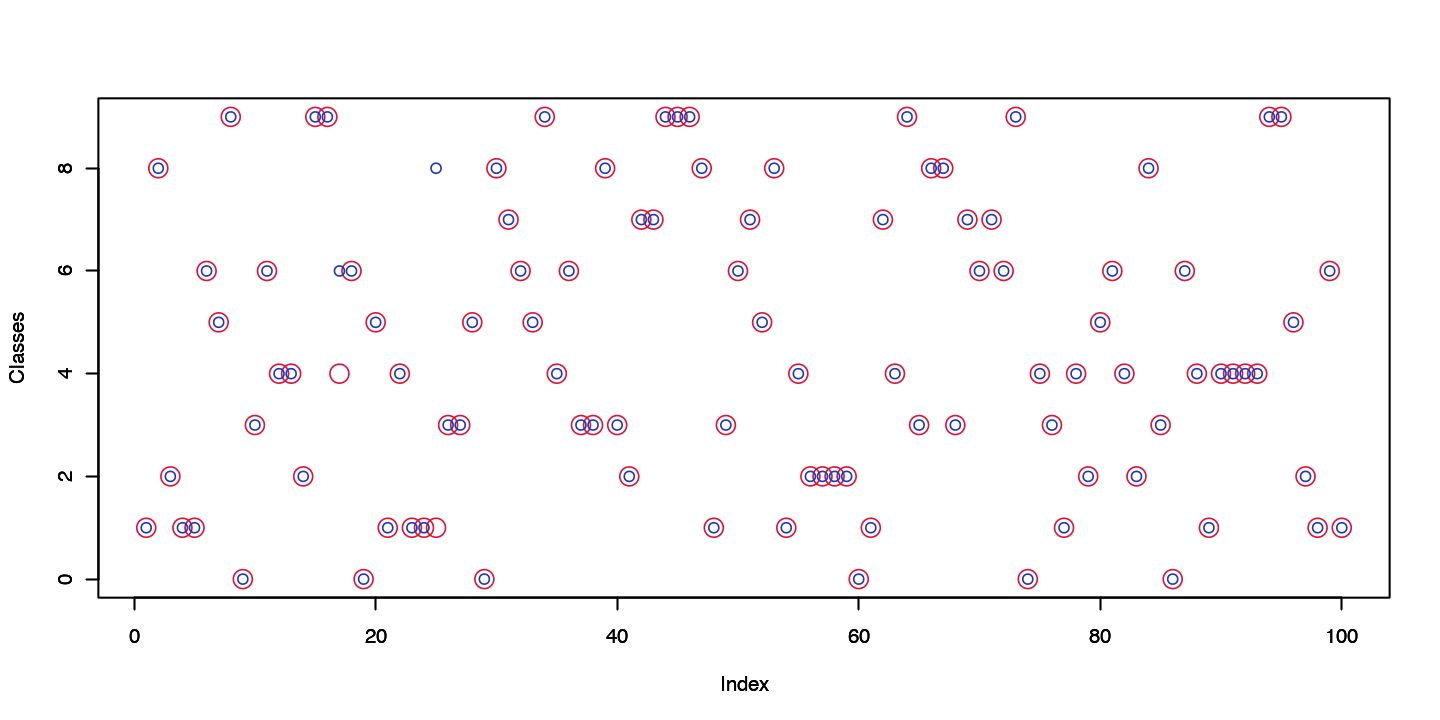

In [98]:
crimson <- rgb (220/255, 20/255, 60/255)
persian_blue <- rgb (28/255, 57/255, 187/255)

plot(y_test_predict[1:100], col=crimson, cex=2, xlab="Index", ylab="Classes")
options(repr.plot.width=12, repr.plot.height=6)
par(new=TRUE)
plot(y_test_labels[1:100], col=persian_blue, xlab="Index", ylab="Classes")

In [ ]:
mlp_model2 <- keras_model_sequential() 
mlp_model2 %>%


## Convolutional Neural Network (CNN)

In [ ]:
cnn_model <- keras_model_sequential()

cnn_model %>%
  layer_conv_2d(
    filter = 32, kernel_size = c(3,3), padding = "same", 
    input_shape = c(32, 32, 3)
  ) %>%
  layer_activation("relu") %>%
  layer_conv_2d(filter = 32, kernel_size = c(3,3)) %>%
  layer_activation("relu") %>%
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  layer_dropout(0.2) %>%
  
  layer_conv_2d(filter = 64, kernel_size = c(3,3), padding = "same") %>%
  layer_activation("relu") %>%
  layer_conv_2d(filter = 64, kernel_size = c(3,3)) %>%
  layer_activation("relu") %>%
  layer_max_pooling_2d(pool_size = c(2,2)) %>%
  layer_dropout(0.2) %>%
  
  layer_flatten() %>%
  layer_dense(512) %>%
  layer_activation("relu") %>%
  layer_dropout(0.4) %>%
  
  layer_dense(10) %>%
  layer_activation("softmax")

In [100]:
cnn_model %>% compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")

In [ ]:
cnn_history <- cnn_model %>% fit(x_train2, y_train2, epochs=3, batch_size=128, validation_split=0.2)

In [ ]:
options(repr.plot.width=12, repr.plot.height=6)
par(pin=c(11, 5.5))
    
plot(cnn_history)

In [ ]:
cnn_loss_and_metrics <- cnn_model %>% evaluate(x_test2, y_test2)
cnn_loss_and_metrics

In [ ]:
y_test_predict <- mlp_model %>% predict_classes(x_test)